In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [2]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.shape

(546, 12)

In [4]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [6]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [7]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [8]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Linear Regression using Normal Equation

In [9]:
# y = df['price']
# x = df.drop(['price'], axis=1)
x = df[['lotsize']] #,'bathrms','bedrooms']
y = df['price']

In [10]:
print(x.shape, y.shape)
print(x.T.shape)

(546, 1) (546,)
(1, 546)


In [11]:
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

In [12]:
h = np.dot(x,w)
h.shape

(546,)

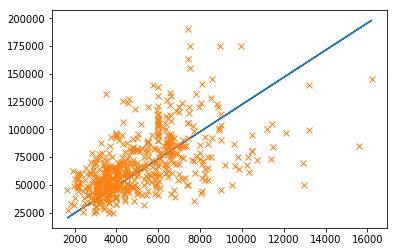

In [13]:
plt.plot(x,h,x,y,'x')
plt.show()

In [14]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()


In [15]:
# x1 = np.array(x)
# x2 = x1[:,1]
# x1 = x1[:,0]
# print(x1.shape, x2.shape)

# plt.plot(x1,h,'og',x1,y,'x')
# plt.show()
# plt.plot(x2,h,'og',x2,y,'x')
# plt.show()
# # ax = plt.axes(projection='3d')
# # ax.plot3D(x1,x2,h,'x')
# # plt.show()

In [16]:
print(h.shape, y.shape)

(546,) (546,)


In [17]:
error = np.sum((h-y)**2)/(h.size)
print(error)
acc = np.sum((np.abs(np.divide((h-y),y))))/h.size
print(acc)

682559306.0737922
0.2836899349357931


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
clf = LinearRegression(normalize=True)
clf.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
clf.score(x,y)

0.28707700259705604

In [21]:
h_skl = clf.predict(x)

In [22]:
(np.sum(h_skl-y)**2)/h_skl.size

3.971436529250932e-20

# Gradient Descent

In [23]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [24]:
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

In [25]:
print(x.shape, y.shape)
m = x.shape[0]
n = x.shape[1]
print(m,n)

t = np.ones((m,1))
x = np.hstack((t,x))
x.shape

(546, 1) (546,)
546 1


(546, 2)

In [26]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print(x.shape, w.shape, y.shape)
alpha = 0.001
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
log = np.array([])
w0_log = []
w1_log = []
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(n+1):
        temp[i] = w[:,i] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[:,i] = temp[i]
    
    w0_log = np.append(w0_log,w[:,0])
    w1_log = np.append(w1_log,w[:,1])
    
    J = (1/2*m)*np.sum(np.square(h-y))
    log = np.append(log, J)
    iterations+=1

(546, 2) (1, 2) (546, 1)


In [27]:
# h = np.dot(x,w.T)
# plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
# plt.xlabel('Lotsize')
# plt.ylabel('Price')
# plt.show()

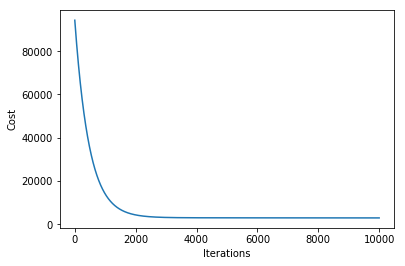

In [28]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

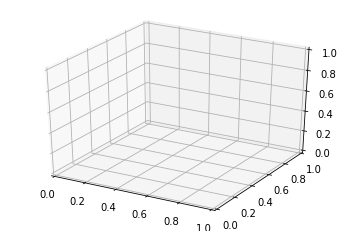

In [29]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
# ax.contour3D(x[:,1],x[:2],y)

In [30]:
x

array([[1.        , 0.28865979],
       [1.        , 0.16151203],
       [1.        , 0.09690722],
       ...,
       [1.        , 0.29896907],
       [1.        , 0.29896907],
       [1.        , 0.29896907]])

In [31]:
h = np.dot(x,w.T)
h.shape

(546, 1)

In [32]:
np.meshgrid()

[]

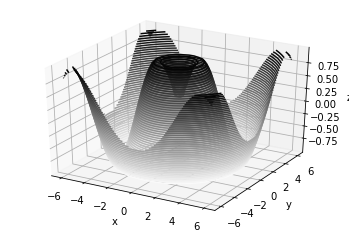

In [33]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [34]:
def cpf(a,b):
    W = np.array([a,b])
    h = np.dot(x,W.T)
    J = (1/2*m)*np.sum(np.square(h-y))
    return J

W0_log, W1_log = np.meshgrid(w0_log, w1_log)
J = cpf(W0_log, W1_log)




ValueError: shapes (30,) and (10000,10000,2) not aligned: 30 (dim 0) != 10000 (dim 1)

In [ ]:
w.shape

In [ ]:
print(x)

In [ ]:
print(X)

In [ ]:
w[:,0]

In [35]:
w0_log

array([0.92563903, 0.92485627, 0.92407433, ..., 0.17533872, 0.17533757,
       0.17533642])

In [ ]:
a=[1]
b=[2]
c = [a,b]

In [ ]:
c

In [36]:
w0_log.shape

(10000,)